In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ПАНО

In [4]:
df_Time_AT = pd.read_csv('Time_AT_FR_LETI.csv', delimiter = ';')
df_Time_AT = df_Time_AT.drop(['Unnamed: 0', 'Unnamed: 4'], axis=1)
df_Time_AT

,FileNum,AT_time,fast_phase_time
0,0,475.0,915.0
1,1,585.0,1060.0
2,2,475.0,880.0
3,3,500.0,1130.0
4,4,620.0,1080.0
...,...,...,...
1488,1496,815.0,1145.0
1489,1497,830.0,1270.0
1490,1498,840.0,1130.0
1491,1499,885.0,1195.0


In [3]:
df_Time_AT['AT_time'].median()

670.0

In [4]:
df_Time_AT['AT_time'].mean()

676.5482573726541

In [5]:
df_Time_AT['AT_time'].describe()

count    1492.000000
mean      676.548257
std       141.887188
min       285.000000
25%       585.000000
50%       670.000000
75%       760.000000
max      1415.000000
Name: AT_time, dtype: float64

array([[<Axes: title={'center': 'AT_time'}>]], dtype=object)

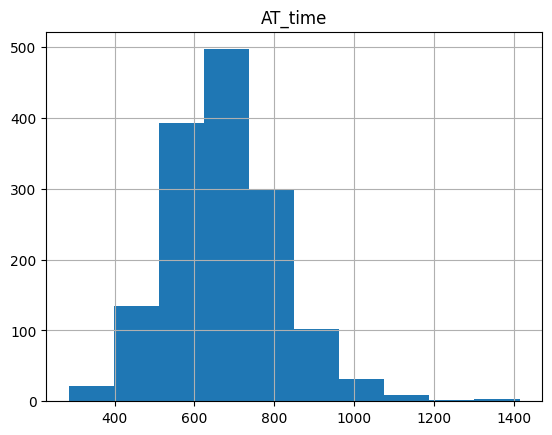

In [6]:
df_Time_AT.hist(column='AT_time')

<Axes: >

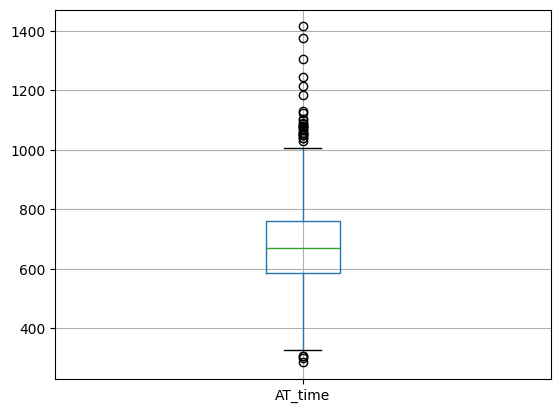

In [7]:
df_Time_AT.boxplot(column='AT_time')

## МАССА

In [2]:
df_massa = pd.read_csv('D:/anaerobic_treashold/Massa.csv', delimiter = ';')
df_massa = df_massa.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df_massa.head()

,massa,file_id
0,105.0,0
1,100.0,1
2,107.0,2
3,102.6,3
4,102.4,4


In [10]:
df_massa['massa'].median()

76.0

In [11]:
df_massa['massa'].mean()

77.07943737441394

array([[<Axes: title={'center': 'massa'}>]], dtype=object)

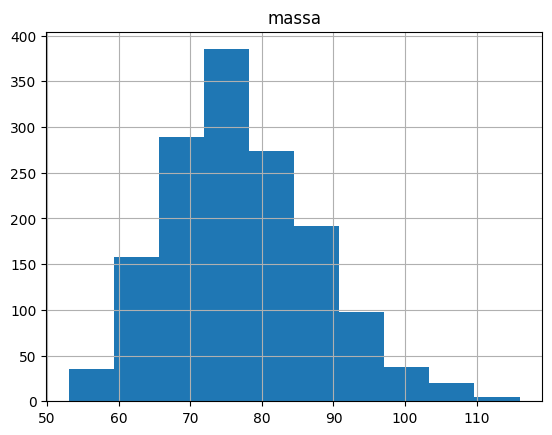

In [12]:
df_massa.hist(column='massa')

<Axes: >

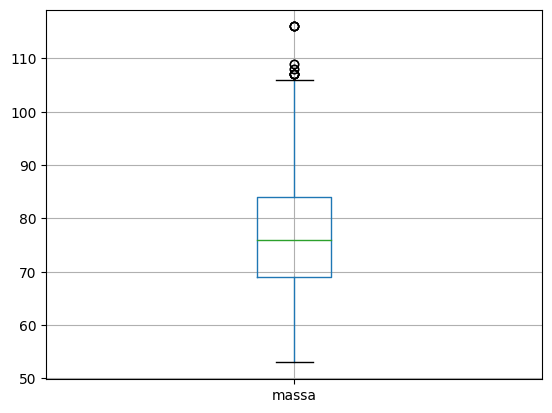

In [13]:
df_massa.boxplot(column='massa')

## Возраст

In [14]:
df_Age = pd.read_csv('D:/anaerobic_treashold/Age_nameid_fileid.csv', index_col='file_id')
df_Age = df_Age.drop(['Unnamed: 0'], axis=1)
df_Age.head()

,Age,name_id
file_id,,
0,22,0
1,24,0
2,22,0
3,26,0
4,25,0


In [15]:
df_Age['Age'].median()

24.0

In [16]:
df_Age['Age'].mean()

24.666666666666668

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

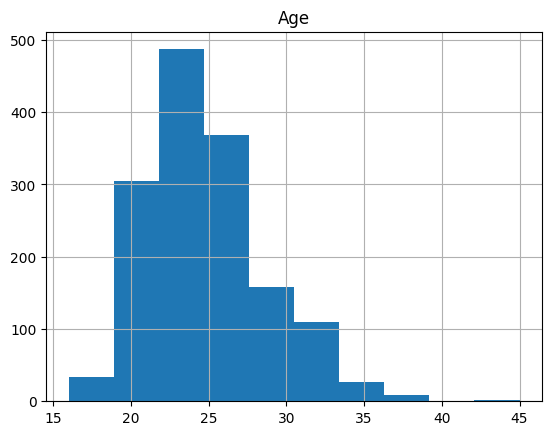

In [17]:
df_Age.hist(column='Age')

<Axes: >

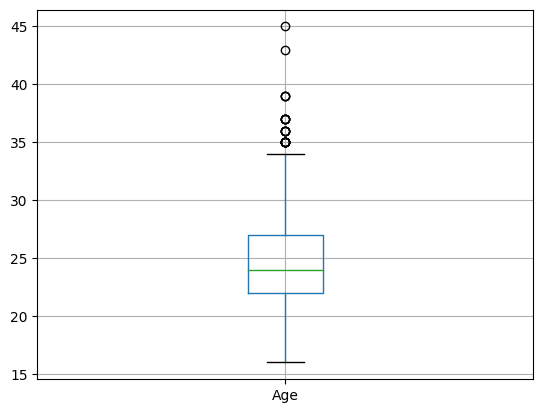

In [18]:
df_Age.boxplot(column='Age')

## ПАНО от массы 

In [5]:
massa_column= df_massa['massa']
df_Time_AT['massa'] = massa_column
df_Time_AT

,FileNum,AT_time,fast_phase_time,massa
0,0,475.0,915.0,105.0
1,1,585.0,1060.0,100.0
2,2,475.0,880.0,107.0
3,3,500.0,1130.0,102.6
4,4,620.0,1080.0,102.4
...,...,...,...,...
1488,1496,815.0,1145.0,92.0
1489,1497,830.0,1270.0,69.0
1490,1498,840.0,1130.0,68.0
1491,1499,885.0,1195.0,68.0


<Axes: xlabel='massa', ylabel='AT_time'>

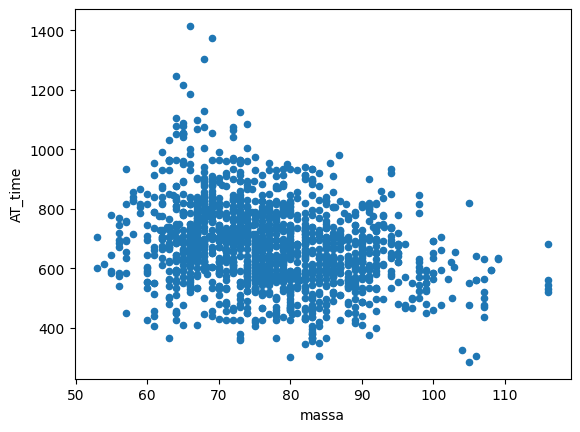

In [20]:
df_Time_AT.plot(x = 'massa', y = 'AT_time', kind = 'scatter')

## Сколько выполнено тестов 

In [21]:
df_Age_nameid_fileid = pd.read_csv('D:/anaerobic_treashold/Age_nameid_fileid.csv')
df_Age_nameid_fileid = df_Age_nameid_fileid.drop(['Unnamed: 0', 'Age'], axis=1)
df_Age_nameid_fileid.groupby(['name_id']).count()

,file_id
name_id,
0,15
1,3
2,6
3,3
4,4
...,...
227,5
228,15
229,1


## Корреляция 

<Axes: >

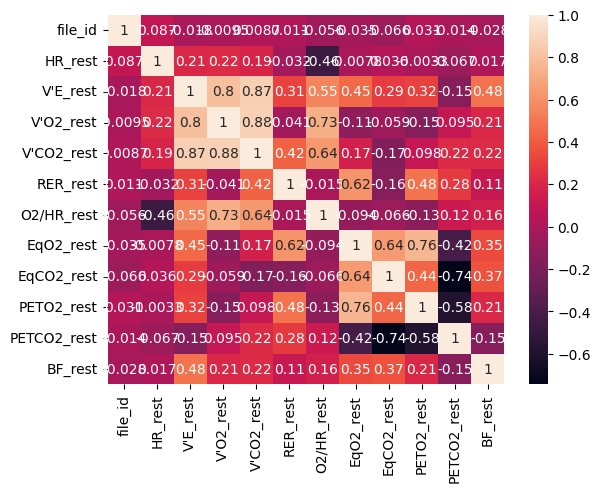

In [6]:
df_Values_rest = pd.read_csv('D:/anaerobic_treashold/Values_rest.csv')
df_all = df_Values_rest.drop(['file_id'], axis = 1)
#V_O2_column = df_Values_rest["V'O2_rest"]
#V_CO2_column = df_Values_rest["V'CO2_rest"]
#df_all["V'O2_rest"] = V_O2_column
#df_all["V'CO2_rest"] = V_CO2_column

df_all['massa'] = massa_column
AT_time_column= df_Time_AT['AT_time']
df_all['AT_time'] = AT_time_column
sns.heatmap(df_Values_rest.corr(), annot = True)